<img src="images/linear_regression.png" alt="drawing" style=width:1000; />

# **Ordinary Linear Regression**

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [78]:
advertising = pd.read_csv('data/Advertising.csv')
print("Advertising Expendature x1000 dollar per Media Outlet & Resulting Sales")

advertising['Total Expenditure'] = advertising['TV'] \
                                 + advertising['radio'] \
                                 + advertising['newspaper']
advertising.head()

Advertising Expendature x1000 dollar per Media Outlet & Resulting Sales


,TV,radio,newspaper,sales,Total Expenditure
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Ordinary Linear Regression using Numpy

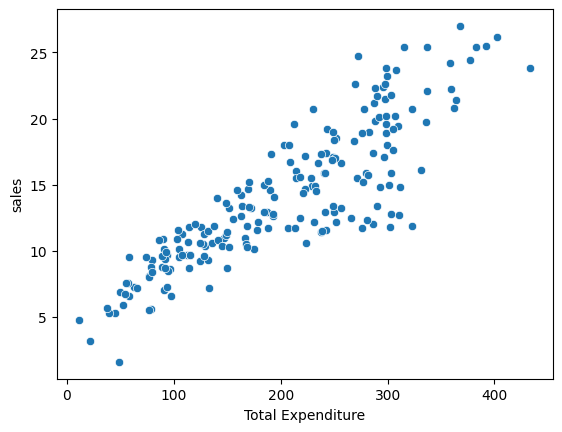

In [79]:
sns.scatterplot(data=advertising, x='Total Expenditure', y='sales')
plt.show()

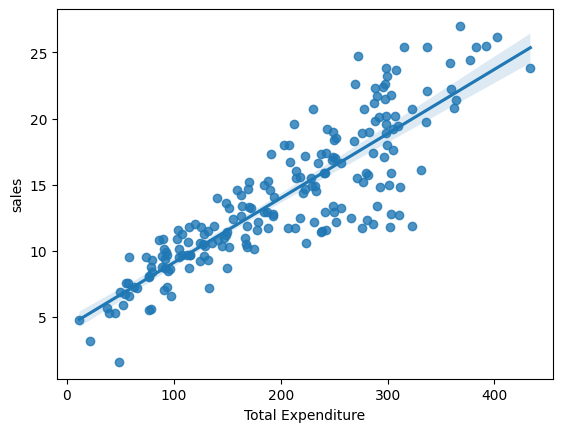

In [80]:
sns.regplot(data=advertising, x='Total Expenditure', y='sales')
plt.show()

In [81]:
X = advertising['Total Expenditure']   # feature matrix
y = advertising['sales']               # prediction vector

In [82]:
# help(np.polyfit)

In [83]:
beta = np.polyfit(X, y, deg=1)
beta

array([0.04868788, 4.24302822])

In [84]:
potential_expenditure = np.linspace(0, 500, 100)
predicted_sales = beta[0] * potential_expenditure + beta[1]

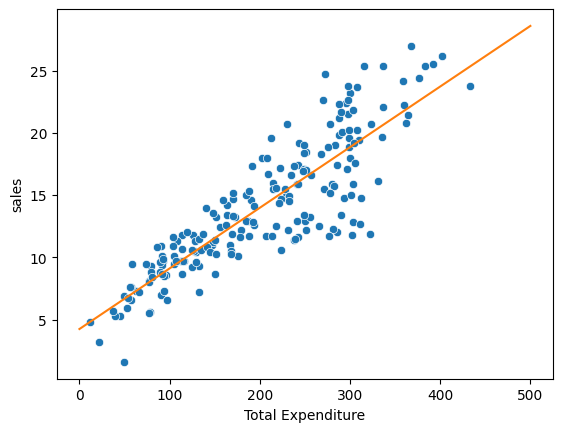

In [85]:
sns.scatterplot(data=advertising, x='Total Expenditure', y='sales')
plt.plot(potential_expenditure, predicted_sales, color='tab:orange')

fit $X$ and $y$ to a 3rd order polynomial

$ y = b_3x^3 + b_2 x^2 + b_1 x + b_0 $

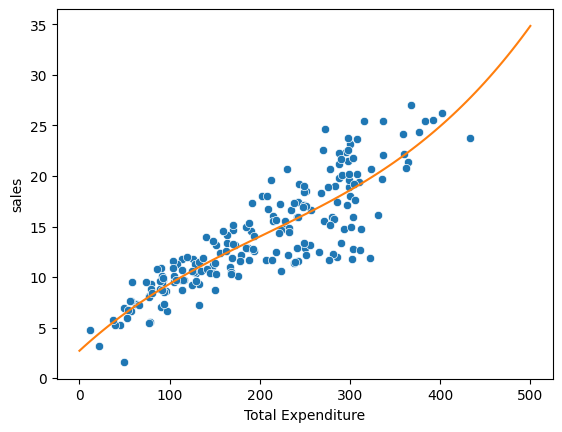

In [86]:
beta = np.polyfit(X, y, 3)

potential_expenditure = np.linspace(0, 500, 100)

predicted_sales = beta[0]*potential_expenditure**3 \
                + beta[1]*potential_expenditure**2 \
                + beta[2]*potential_expenditure \
                + beta[3]

sns.scatterplot(data=advertising, x='Total Expenditure', y='sales')
plt.plot(potential_expenditure, predicted_sales, color='tab:orange')

## Linear Regression using Scikit-Learn

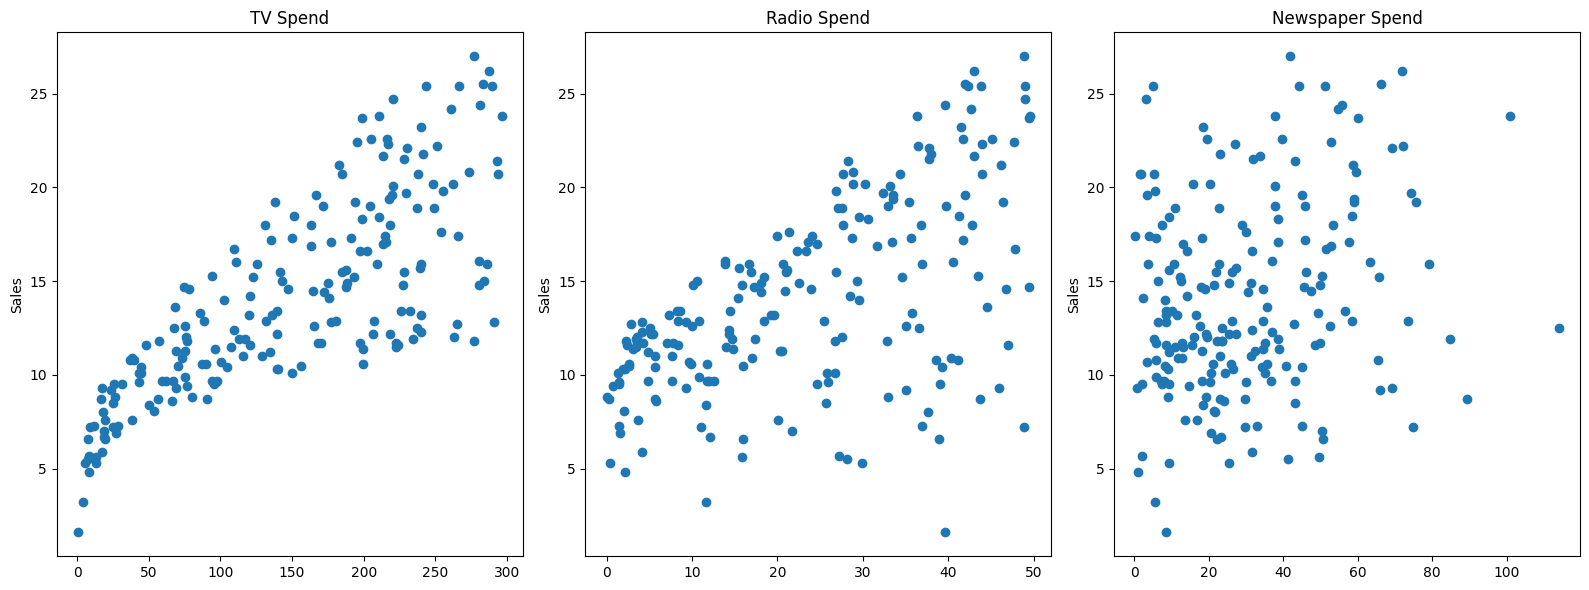

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))

ax[0].plot(advertising['TV'],advertising['sales'],'o')
ax[0].set_ylabel("Sales")
ax[0].set_title("TV Spend")

ax[1].plot(advertising['radio'],advertising['sales'],'o')
ax[1].set_title("Radio Spend")
ax[1].set_ylabel("Sales")

ax[2].plot(advertising['newspaper'],advertising['sales'],'o')
ax[2].set_title("Newspaper Spend")
ax[2].set_ylabel("Sales")
plt.tight_layout()

<Axes: >

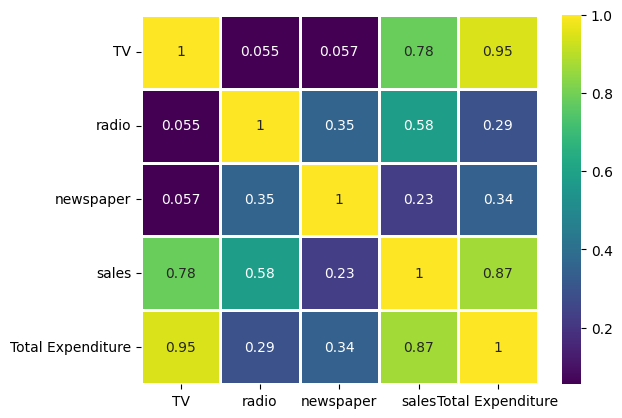

In [88]:
advertising.corr()

sns.heatmap(advertising.corr(), annot=True, cmap='viridis', linewidth=2)

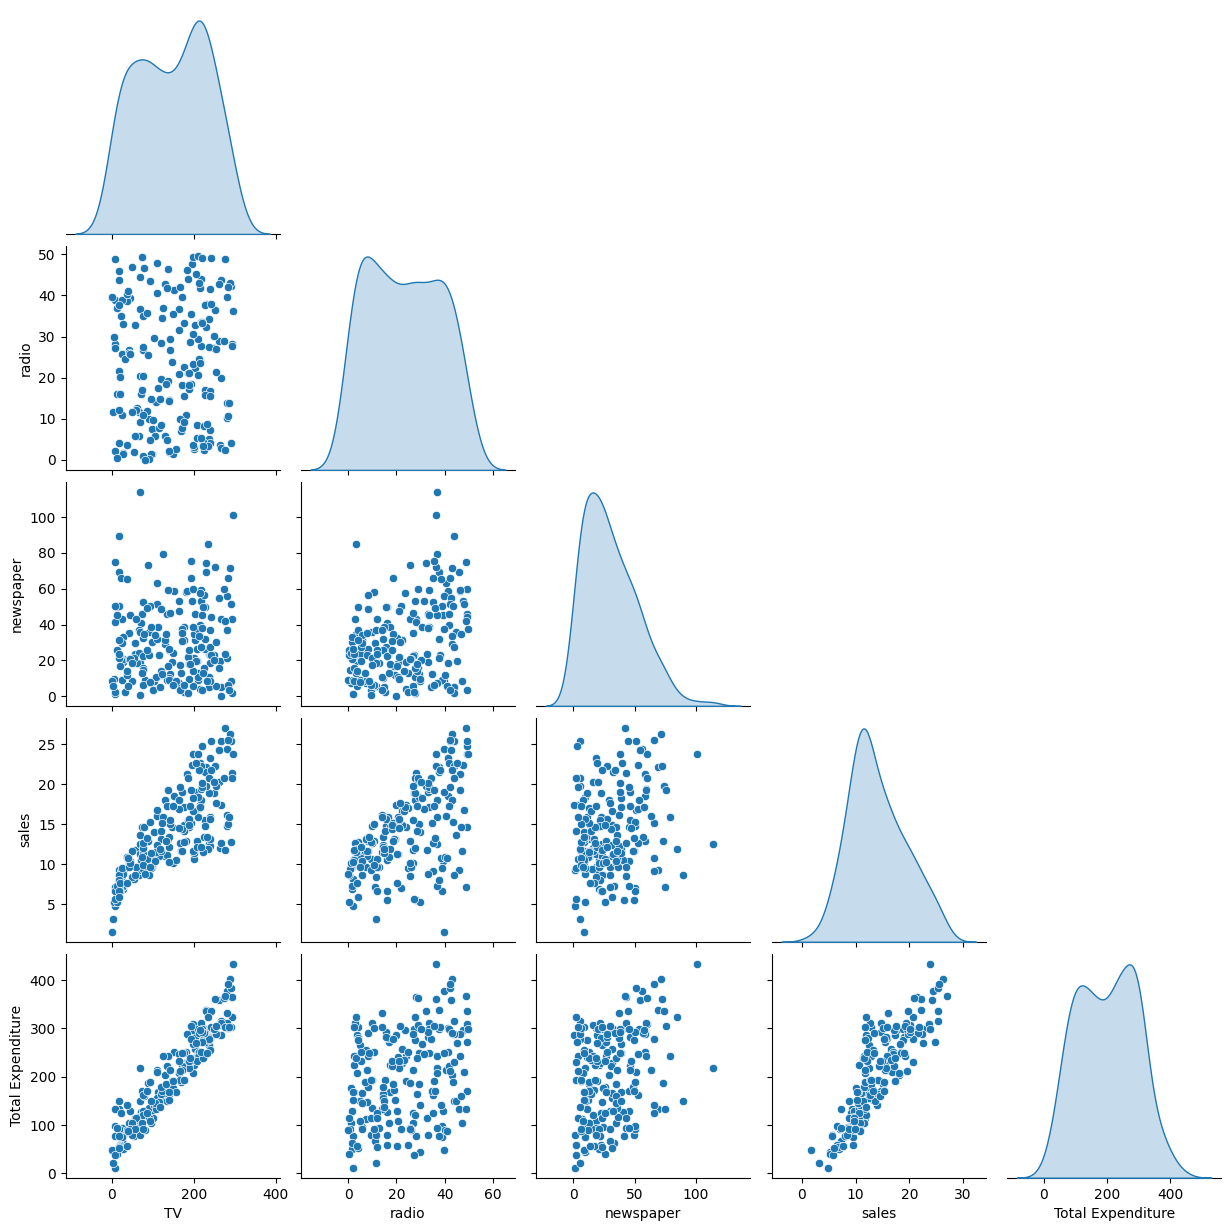

In [89]:
# Relationships between features
sns.pairplot(advertising,diag_kind='kde', corner=True)

In [90]:
X = advertising.drop(['sales', 'Total Expenditure'], axis=1)
y = advertising['sales']
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [92]:
# help(train_test_split)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,     # proportion of data that goes into the test set
                                                    random_state=42)    # random seed

In [94]:
model = LinearRegression()

In [95]:
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_predictions = model.predict(X_test)

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
advertising.describe()['sales']

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

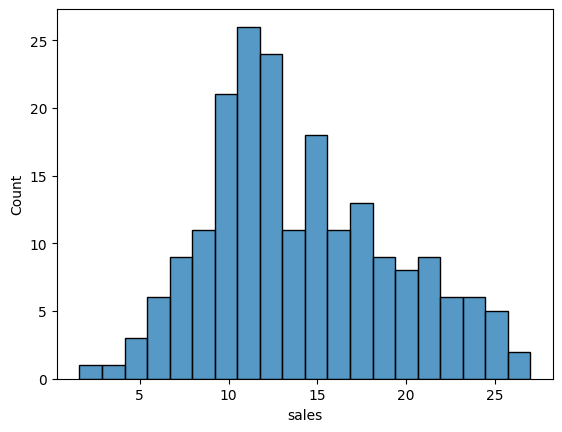

In [99]:
sns.histplot(data=advertising, x='sales', bins=20)
plt.show()

In [100]:
MAE = mean_absolute_error(y_test, y_predictions)
MSE = mean_squared_error(y_test, y_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, y_predictions))

print(f'MAE = {round(MAE, 2)}')
print(f'RMSE = {round(RMSE, 2)}')

MAE = 1.49
RMSE = 1.93


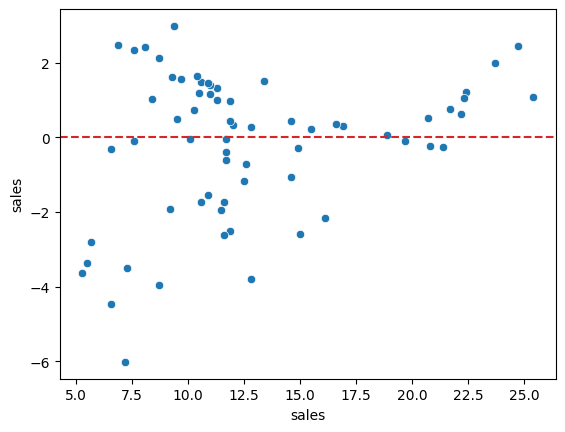

In [101]:
residuals = y_test - y_predictions
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, ls='--', color='tab:red')

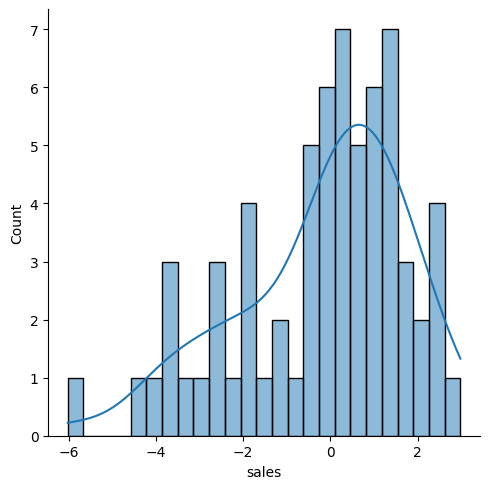

In [102]:
sns.displot(residuals, bins=25, kde=True)

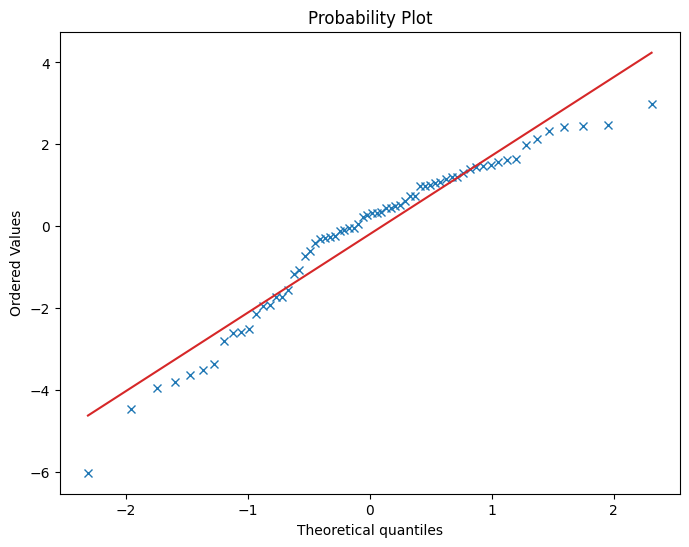

In [103]:
from scipy.stats import probplot

fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
probplot(residuals, plot=ax)

# markers
ax.get_lines()[0].set_markerfacecolor('tab:blue')
ax.get_lines()[0].set_markeredgecolor('tab:blue')
ax.get_lines()[0].set_marker('x')

# line
ax.get_lines()[1].set_color('tab:red')

plt.show()

## Final Model

### Create Model

Create new model instance and fit it with the _entire_ data set

In [104]:
final_model = LinearRegression()
final_model.fit(X, y)

LinearRegression()

### Inspect Coefficients

In [105]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


**Interpretation**

* 1 unit increase in TV ad expenditure ($1000 more spent on TV ads) will lead to 46 more units sold

* 1 unit increase in Radio ad expenditure ($1000 more spent on Radio ads) will lead to 189 more units sold

* 1 unit increase in Newspaper ad expenditure ($1000 more spent on Newspaper ads) will lead to 0 more units sold


### Compare Predictions to Original Data

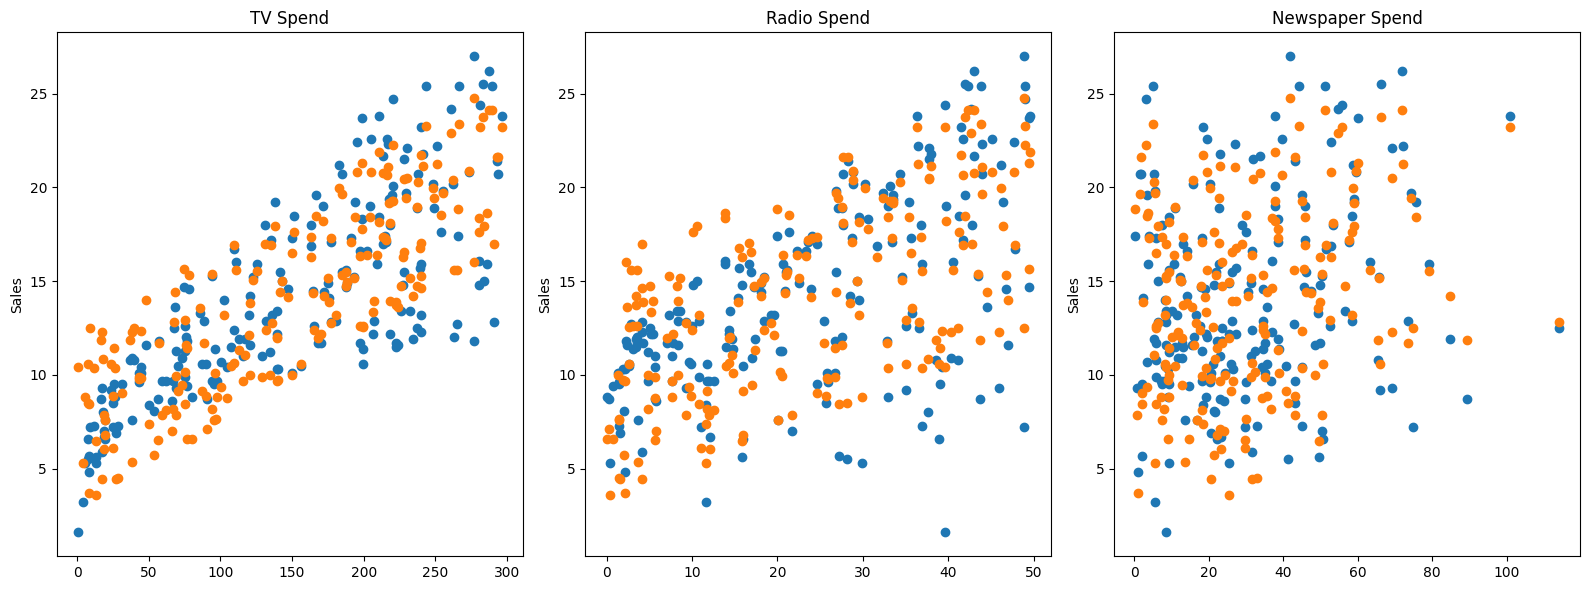

In [106]:
y_pred = final_model.predict(X)

fig, ax = plt.subplots(1, 3, figsize=(16,6))

ax[0].plot(advertising['TV'], advertising['sales'], 'o')
ax[0].plot(advertising['TV'] ,y_pred, 'o')
ax[0].set_ylabel("Sales")
ax[0].set_title("TV Spend")

ax[1].plot(advertising['radio'], advertising['sales'], 'o')
ax[1].plot(advertising['radio'], y_pred, 'o')
ax[1].set_title("Radio Spend")
ax[1].set_ylabel("Sales")

ax[2].plot(advertising['newspaper'], advertising['sales'], 'o')
ax[2].plot(advertising['newspaper'], y_pred, 'o')
ax[2].set_title("Newspaper Spend")
ax[2].set_ylabel("Sales")
plt.tight_layout()

In [107]:
from joblib import dump, load

In [108]:
dump(final_model, 'final_sales_lin_reg.joblib')

['final_sales_lin_reg.joblib']

In [109]:
loaded_model = load('final_sales_lin_reg.joblib')  # trained lin reg model

In [110]:
pd.DataFrame(loaded_model.coef_, X.columns, columns=['Coefficient'])

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [111]:
X.shape

(200, 3)

In [112]:
# Expenditure: 149 TV, 22 Radio, 12 Newspaper
# Predicted Sales: ???

campaign = [[149, 22, 12]]
campaign = pd.DataFrame({'TV': [149], 
                         'radio': [22], 
                         'newspaper': [12]})

loaded_model.predict(campaign)

array([13.893032])